In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro, levene
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset, het_white

In [17]:
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figsize(8, 5)
    sns.histplot(residuals, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.title(title)
    plt.show()

In [18]:
def check_assumptions(model, X, y):
    y_pred = model.predict(X)
    residuals = y - y_pred

    #Plot fitted vs observed values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, y, alpha=0.7)
    plt.xlabel('Fitted values')
    plt.ylabel('Observed values')
    plt.title('Fitted vs observed values')
    plt.show()

    #Plot residuals vs fitted values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs fitted values')
    plt.show()

    #Summar of model
    print(model.summary())

    #Statsistical tests

    #Ramsey Test for linearity
    reset_test = linear_reset(model, use_f=True)
    print(f"Ramsey Reset Test for lineartity: F-Statistic={reset_test.fvalue:.4f}, p-value={reset_test.pvalue:.4f}")

    #Levene test for homoscedasticity
    stat, p = levene(y_pred, residuals)
    print(f"Levene test for homoscedasticity: Statistic={stat:.4f}, p-value={p:.4f}")

    #Breusch-Pagan test for heteroscedasticity

    bp_test = het_breuschpagan(residuals, X)
    print(f"Breusch-Pagan Test LM: Statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")

    #White test for heteroscedasticity
    White_Test = het_white(residuals, X)
    print(f"White Test LM: Statistic={White_Test[0]:.4f}, p-value={White_Test[1]:.4f}")

    #Shapiro-Wilk test for normality of residuals
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk test for normality of residuals: Statistic={stat:.4f}, p-value={p:.4f}")


Linear Model with Satisfied Assumptions:


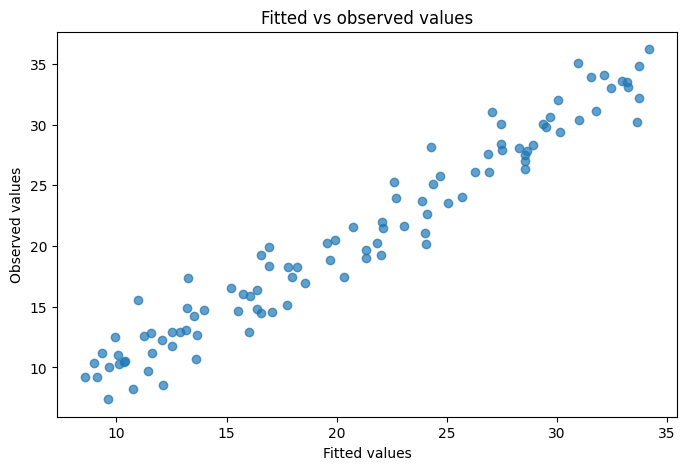

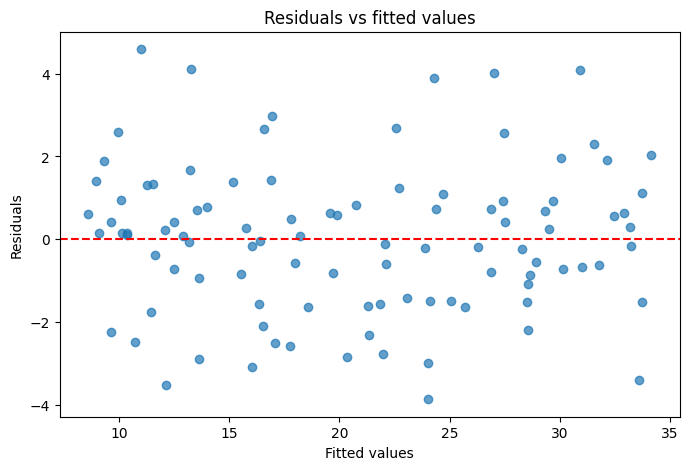

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1810.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           5.45e-65
Time:                        15:24:38   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5324      0.400     13.836      0.0

In [19]:
# Case 1: Data that satisfies assumptions
np.random.seed(42)
x = np.random.uniform(1, 10, 100)
y = 3 * x + 5 + np.random.normal(0, 2, 100)  # Linear relationship with small normal errors

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print("Linear Model with Satisfied Assumptions:")
check_assumptions(model, X, y)


Linear Model with Violated Assumptions:


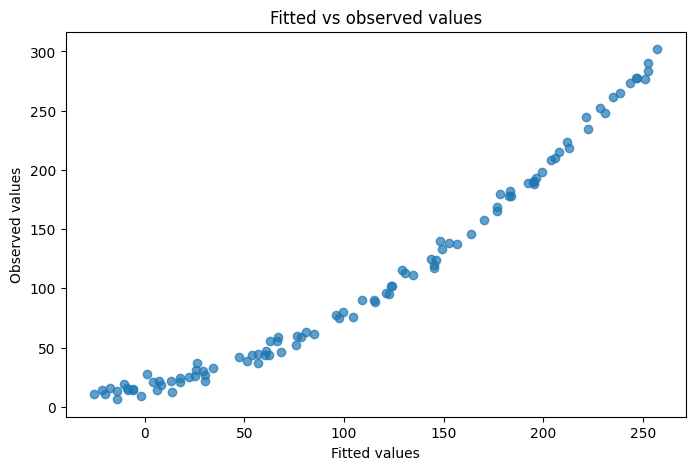

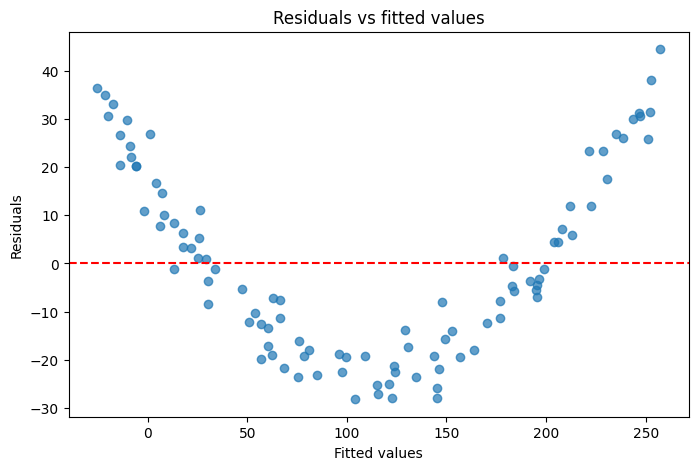

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1917.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.78e-66
Time:                        15:24:38   Log-Likelihood:                -437.86
No. Observations:                 100   AIC:                             879.7
Df Residuals:                      98   BIC:                             884.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.1576      4.295    -13.775      0.0

In [20]:
# Data that violates assumptions
np.random.seed(42)
x = np.random.uniform(1, 10, 100)
y = 3 * x**2 + 5 + np.random.normal(0, 5, 100)  # Nonlinear relationship

X = sm.add_constant(x)
model_violated = sm.OLS(y, X).fit()
print("\nLinear Model with Violated Assumptions:")
check_assumptions(model_violated, X, y)

In [21]:
print("\nViolations in the second case:")
print("1. Non-linearity: The true relationship is quadratic, but a linear model is applied.")
print("2. Heteroscedasticity: The spread of residuals is not constant.")
print("3. Poor fit: R-squared is lower, indicating a worse model.")
print("\nConsequences:")
print("- A non-linear relationship leads to biased estimates and incorrect inferences.")
print("- Heteroscedasticity affects confidence intervals and hypothesis testing.")
print("- Multicollinearity (if present) inflates standard errors and reduces interpretability.")


Violations in the second case:
1. Non-linearity: The true relationship is quadratic, but a linear model is applied.
2. Heteroscedasticity: The spread of residuals is not constant.
3. Poor fit: R-squared is lower, indicating a worse model.

Consequences:
- A non-linear relationship leads to biased estimates and incorrect inferences.
- Heteroscedasticity affects confidence intervals and hypothesis testing.
- Multicollinearity (if present) inflates standard errors and reduces interpretability.
